In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures

In [5]:
data = pd.read_csv("data/diabetes.csv")

In [6]:
y = data.Outcome
X = data.drop(["Outcome"], axis=1)
logistic = LogisticRegression()
logistic.fit(X, y)
y_pred = logistic.predict(X)

c:\Users\Datanomica\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


1. Изучите документацию _sklearn_, посвященную классу [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). Какую еще информацию можно вывести для обученной модели? Попробуйте изменить аргументы при создании модели и посмотрите, как это влияет на качество предсказания.

In [7]:
poly = PolynomialFeatures(6)
poly = poly.fit_transform(X)
polynomial = LogisticRegression()
polynomial.fit(poly, y)
y_pred_poly = polynomial.predict(poly)
polynomial.score(poly, y)


def model_info(data):
  for i, j in data:
    print(i, j)

data = [("Classes", polynomial.classes_),
        ("Number of features", polynomial.n_features_in_),
        ("Actual number of iterations for all classes", polynomial.n_iter_),
        ("Probability estimates \n", (polynomial.predict_proba(poly))[:3])]
model_info(data)

Classes [0 1]
Number of features 3003
Actual number of iterations for all classes [100]
Probability estimates 
 [[0.40843802 0.59156198]
 [0.49762898 0.50237102]
 [0.21210313 0.78789687]]


c:\Users\Datanomica\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


2. Попробуйте применить к той же задаче другие модели классификации. Для каждой из них выведите матрицу классификации и оценку точности. Рекомендуется исследовать следующие модели:
    1. Метод опорных векторов
        1. Без ядра
        1. С линейным ядром
        1. С гауссовым ядром
        1. С полиномиальным ядром
    1. Метод ближайших соседей
    1. Многослойный перцептрон
    1. Дерево решений
    1. Наивный байесовский классификатор
    1. (\*) Другие методы:
        1. Пассивно-агрессивный классификатор
        1. Гребневый классификатор
        1. Случайный лес
        1. Беггинг
        1. Другие модели по желанию

c:\Users\Datanomica\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


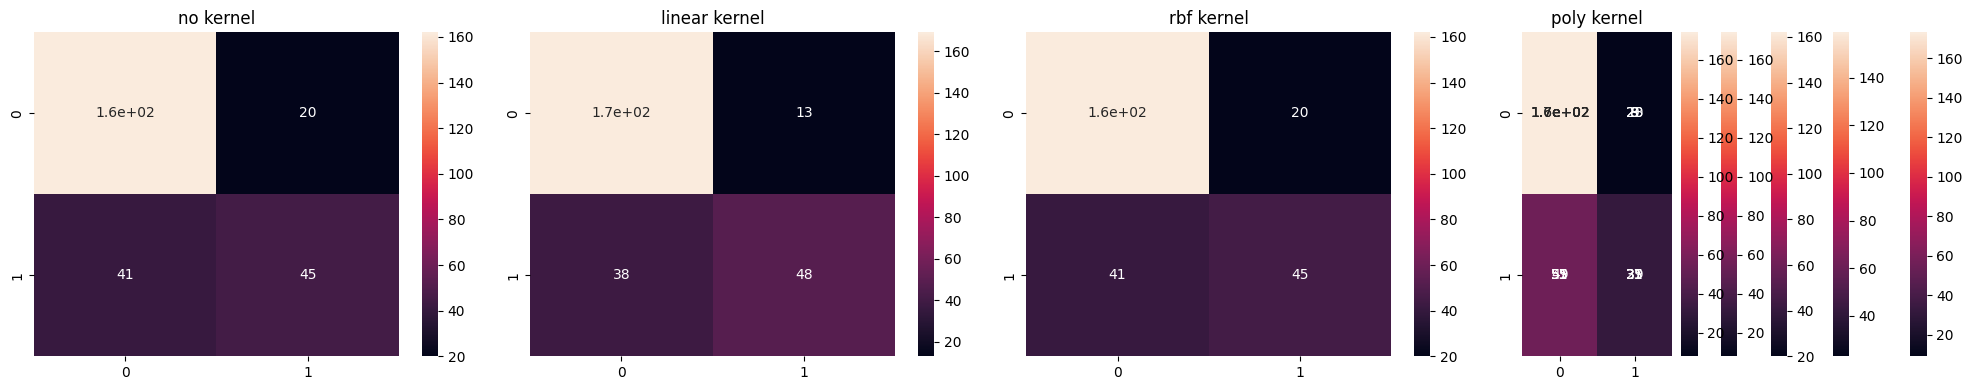

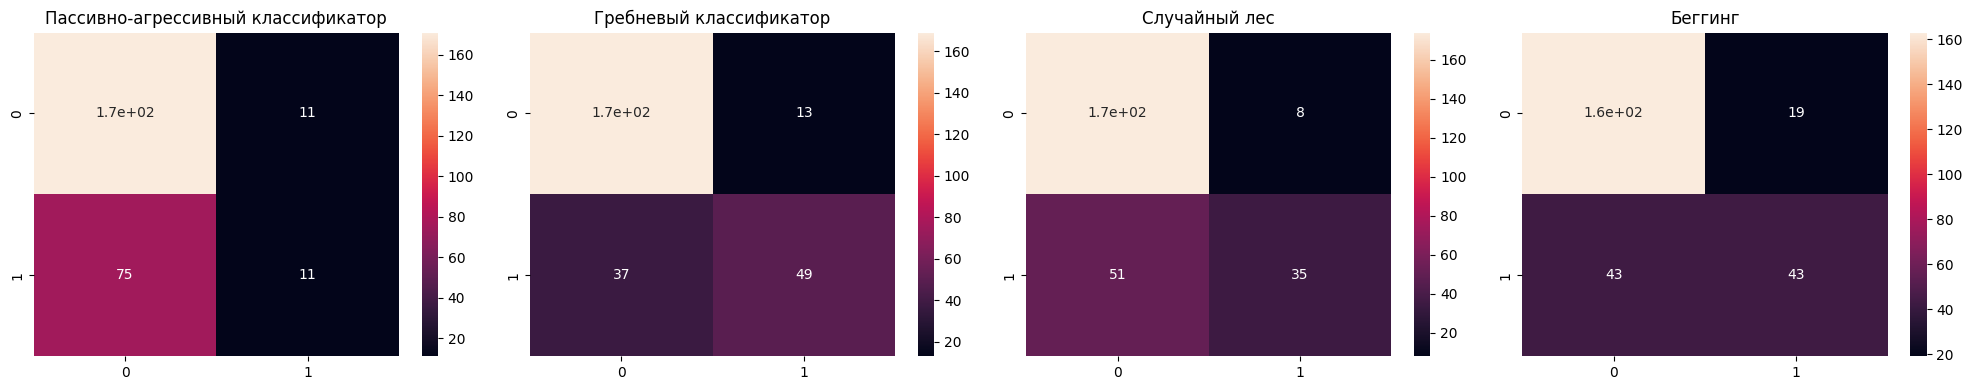

In [8]:
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import RidgeClassifierCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier


X_train = X[:500]
y_train =y[:500]
X_test = X[500:]
y_test = y[500:]

# Метод опорных векторов
f, axs = plt.subplots(1, 4, figsize=(20, 4))

# Без ядра
model1 = svm.SVC()
model1.fit(X_train, y_train)
sns.heatmap(metrics.confusion_matrix(y_test, model1.predict(X_test)), annot=True, ax=axs[0])
axs[0].set_title("no kernel")
# С линейным ядром
model2 = svm.SVC(kernel='linear')
model2.fit(X_train, y_train)
sns.heatmap(metrics.confusion_matrix(y_test, model2.predict(X_test)), annot=True, ax=axs[1])
axs[1].set_title("linear kernel")
# С гауссовым ядром
model3 = svm.SVC(kernel='rbf')
model3.fit(X_train, y_train)
sns.heatmap(metrics.confusion_matrix(y_test, model3.predict(X_test)), annot=True, ax=axs[2])
axs[2].set_title("rbf kernel")
# С полиномиальным ядром
model4 = svm.SVC(kernel='poly')
model4.fit(X_train, y_train)
sns.heatmap(metrics.confusion_matrix(y_test, model4.predict(X_test)), annot=True, ax=axs[3])
axs[3].set_title("poly kernel")
f.tight_layout()

# Метод ближайших соседей
nbrs = KNeighborsClassifier(n_neighbors=4)
nbrs.fit(X_train, y_train)
sns.heatmap(metrics.confusion_matrix(y_test, nbrs.predict(X_test)), annot=True)

# Многослойный перцептрон
model5 = MLPClassifier()
model5.fit(X_train, y_train)
sns.heatmap(metrics.confusion_matrix(y_test, model5.predict(X_test)), annot=True)

# Дерево решений
clf = tree.DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, y_train)
sns.heatmap(metrics.confusion_matrix(y_test, clf.predict(X_test)), annot=True)

# Наивный байесовский классификатор
bies = GaussianNB()
bies.fit(X_train, y_train)
sns.heatmap(metrics.confusion_matrix(y_test, clf.predict(X_test)), annot=True)

# Другие модели
f, axs = plt.subplots(1, 4, figsize=(20, 4))

# Пассивно-агрессивный классификатор
cl1 = PassiveAggressiveClassifier(max_iter=1000)
cl1.fit(X_train, y_train)
sns.heatmap(metrics.confusion_matrix(y_test, cl1.predict(X_test)), annot=True, ax=axs[0])
axs[0].set_title("Пассивно-агрессивный классификатор")
# Гребневый классификатор
cl2 = RidgeClassifierCV(alphas=[1e-3, 1e-2, 1e-1, 1])
cl2.fit(X_train, y_train)
sns.heatmap(metrics.confusion_matrix(y_test, cl2.predict(X_test)), annot=True, ax=axs[1])
axs[1].set_title("Гребневый классификатор")
# Случайный лес
cl3 = RandomForestClassifier(max_depth=2, random_state=0)
cl3.fit(X_train, y_train)
sns.heatmap(metrics.confusion_matrix(y_test, cl3.predict(X_test)), annot=True, ax=axs[2])
axs[2].set_title("Случайный лес")
# Беггинг
cl4 = BaggingClassifier()
cl4.fit(X_train, y_train)
sns.heatmap(metrics.confusion_matrix(y_test, cl4.predict(X_test)), annot=True, ax=axs[3])
axs[3].set_title("Беггинг")
f.tight_layout()

3. Напишите функцию, которая автоматически обучает все перечисленные модели и для каждой выдает оценку точности.

In [9]:
def learning(X_train, y_train, X_test, y_test):
  models = [svm.SVC(),svm.SVC(kernel='linear'), svm.SVC(kernel='rbf'),
            svm.SVC(kernel='poly'),  KNeighborsClassifier(n_neighbors=4),
            MLPClassifier(), tree.DecisionTreeClassifier(max_depth=3),
            GaussianNB(), PassiveAggressiveClassifier(max_iter=1000),
            RidgeClassifierCV(alphas=[1e-3, 1e-2, 1e-1, 1]),
            RandomForestClassifier(max_depth=2, random_state=0),
            BaggingClassifier()]
  text = ["Метод опорных векторов (Без ядра)", "Метод опорных векторов (С линейным ядром)",
          "Метод опорных векторов (С гауссовым ядром)", "Метод опорных векторов (С полиномиальным ядром)",
          "Метод ближайших соседей", "Многослойный перцептрон", "Дерево решений", "Наивный байесовский классификатор",
          "Пассивно-агрессивный классификатор", "Гребневый классификатор", "Случайный лес", "Беггинг"]

  scores = []

  # fit models and count errors
  for i in models:
    i.fit(X_train, y_train)
    scores.append(metrics.accuracy_score(y_test, i.predict(X_test)))

  # print result
  return pd.DataFrame({"Models" : text, "Score": scores})


learning(X_train, y_train, X_test, y_test)

,Models,Score
0,Метод опорных векторов (Без ядра),0.772388
1,Метод опорных векторов (С линейным ядром),0.809701
2,Метод опорных векторов (С гауссовым ядром),0.772388
3,Метод опорных векторов (С полиномиальным ядром),0.783582
4,Метод ближайших соседей,0.723881
5,Многослойный перцептрон,0.694030
6,Дерево решений,0.764925
7,Наивный байесовский классификатор,0.783582
8,Пассивно-агрессивный классификатор,0.679104
9,Гребневый классификатор,0.813433


4. Повторите полностью анализ для другой задачи - распознавание вида ириса по параметрам растения (можно использовать метод sklearn.datasets.load_iris()).

In [10]:
from sklearn import datasets
from sklearn.utils import shuffle

data = datasets.load_iris()

df_x = pd.DataFrame(data['data'])
df_y = pd.DataFrame(data['target'])
df = pd.concat([df_x, df_y], axis=1)
df.head()

,0,1,2,3,0
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
df = shuffle(df)
df.head()

,0,1,2,3,0
98,5.1,2.5,3.0,1.1,1
139,6.9,3.1,5.4,2.1,2
9,4.9,3.1,1.5,0.1,0
99,5.7,2.8,4.1,1.3,1
93,5.0,2.3,3.3,1.0,1


In [12]:
X_train =df.iloc[:80,:-1]
X_test =df.iloc[80:,:-1]
y_train = df.iloc[:80,-1]
y_test = df.iloc[80:,-1]

learning(X_train, y_train, X_test, y_test)

c:\Users\Datanomica\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,Models,Score
0,Метод опорных векторов (Без ядра),0.971429
1,Метод опорных векторов (С линейным ядром),0.985714
2,Метод опорных векторов (С гауссовым ядром),0.971429
3,Метод опорных векторов (С полиномиальным ядром),0.985714
4,Метод ближайших соседей,0.942857
5,Многослойный перцептрон,0.985714
6,Дерево решений,0.971429
7,Наивный байесовский классификатор,0.971429
8,Пассивно-агрессивный классификатор,0.985714
9,Гребневый классификатор,0.928571
